In [10]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_DIRECTORY='./data/';
NUM_IMAGES = 714
IMAGE_SIZE = 32
IMAGE_ARR_SIZE = 32 * 32 * 4
TYPE_ARRAY=np.array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy',  
                    'Fighting', 'Fire', 'Ghost', 'Grass', 'Ground',  
                    'Ice','Normal','Poison','Psychic','Rock','Steel','Water'])

def load_images(image_dir):
    labels = []
    names = []
    image_index = 0
    
    
    # 714 because the Flying Pokemon were removed
    X = np.ndarray(shape=(714, IMAGE_ARR_SIZE))
                        
    
    # Loop through all the types directories
    for type in os.listdir(image_dir):
        type_images = os.listdir(image_dir + type + '/')
        
        # Loop through all the images of a type directory
        for image in type_images:
            image_file = os.path.join(image_dir, type, image)
            names.append(image)

            # reading the images as they are; no normalization, no color editing
            image_data = mpimg.imread(image_file)         
            X[image_index, :] = image_data.flatten()
            image_index += 1
            labels.append(type)
        
    return (X, np.asarray(labels), np.asarray(names))


def plot_pokemon(data):
    plt.figure(figsize=(1,1))
    image = data.reshape(32, 32, 4)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

def plot_pokemons(instances, images_per_row=10, **options):
    size = IMAGE_SIZE
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size,4) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        #print (row, np.array(rimages).shape)    
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")
    plt.show()
    
def get_pokemon_of_type(X, labels, type):
    poke_type = []
    for row in range(len(X)-1):
        if (labels[row]==type):
            poke_type.append(X[row])
    return np.asarray(poke_type)

def get_pokemon_type_index(type_name):
    for i in range(len(TYPE_ARRAY)):
        if TYPE_ARRAY[i] == type_name:
            return i;
    return 0

def get_labels_index(labels):
    labels_index = []
    for i in range(len(labels)):
        labels_index.append(get_pokemon_type_index(labels[i]))
    return labels_index

Water Pokemon


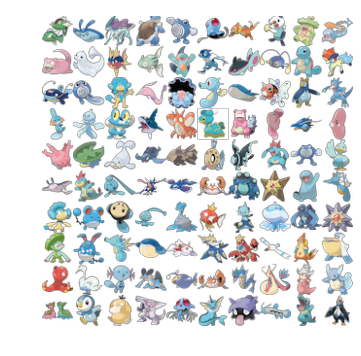

(105, 4096)
Normal Pokemon


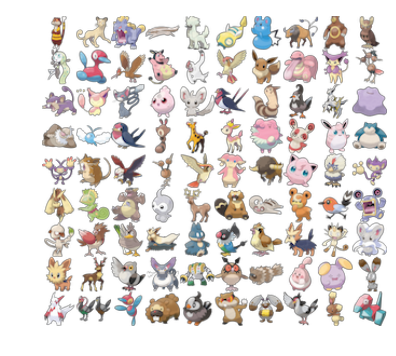

(93, 4096)


In [11]:
X, labels, names = load_images(IMAGE_DIRECTORY)
shuffle_index = np.random.permutation(NUM_IMAGES)
X, labels = X[shuffle_index], labels[shuffle_index]
labels_index = get_labels_index(labels)

print ('Water Pokemon')
water = get_pokemon_of_type(X, labels, 'Water')
plot_pokemons(water, images_per_row=10)
print (water.shape)

print ('Normal Pokemon')
normal = get_pokemon_of_type(X, labels, 'Normal')
plot_pokemons(normal, images_per_row=10)
print (normal.shape)

In [12]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=17, 
                                        feature_columns=feature_columns)
dnn_clf.fit(X, labels_index, batch_size=50, steps=2000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f20520f9410>, '_model_dir': '/tmp/tmpCfG4rT', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f20673ffd10>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4096, default_value=None, dtype=tf.float64, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7f2067bc1d70>, 'input_layer_min_slice_size': None})

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/tmpCfG4rT/model.ckpt-2000
('Predict', [6, 16, 4, 15, 11, 6, 9, 8, 8, 14, 15, 11, 3, 2, 8, 13, 11, 5, 7, 11])
('Actual ', [6, 16, 4, 15, 11, 6, 9, 8, 8, 14, 15, 11, 3, 2, 8, 13, 11, 5, 7, 11])


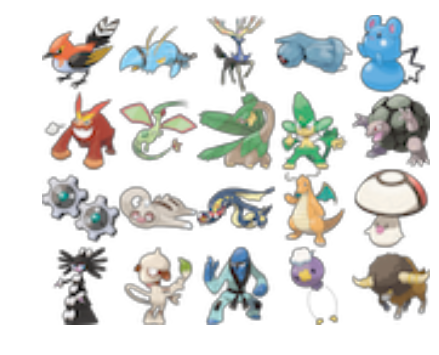

['Fire' 'Water' 'Fairy' 'Steel' 'Normal' 'Fire' 'Ground' 'Grass' 'Grass'
 'Rock' 'Steel' 'Normal' 'Electric' 'Dragon' 'Grass' 'Psychic' 'Normal'
 'Fighting' 'Ghost' 'Normal']
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the s

In [13]:
shuffle_index = np.random.permutation(714)
sample, sample_labels= X[shuffle_index], labels[shuffle_index]
sample = sample[:20]
sample_labels = sample_labels[:20]
sample_labels_index = get_labels_index(sample_labels)

predictions = list(dnn_clf.predict(sample))
print("Predict", predictions)
print ("Actual ", sample_labels_index)
plot_pokemons(sample, images_per_row=5)
print(sample_labels)

accuracy_score = dnn_clf.evaluate(sample, sample_labels_index, steps=1)["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))